Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [9]:
#pip install tensorflow

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [12]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')


In [14]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [18]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [21]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define parameters
data_dir = r'C:\Users\91702\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train'
img_height = 180
img_width = 180
batch_size = 32
seed = 123

# Create the training dataset
train_ds = image_dataset_from_directory(
    data_dir,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'  # or 'categorical' or 'binary', depending on your problem
)

# Display dataset information
class_names = train_ds.class_names
print(f"Class names: {class_names}")

for images, labels in train_ds.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")


Found 2239 files belonging to 9 classes.
Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Image batch shape: (32, 180, 180, 3)
Label batch shape: (32,)


In [22]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [25]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

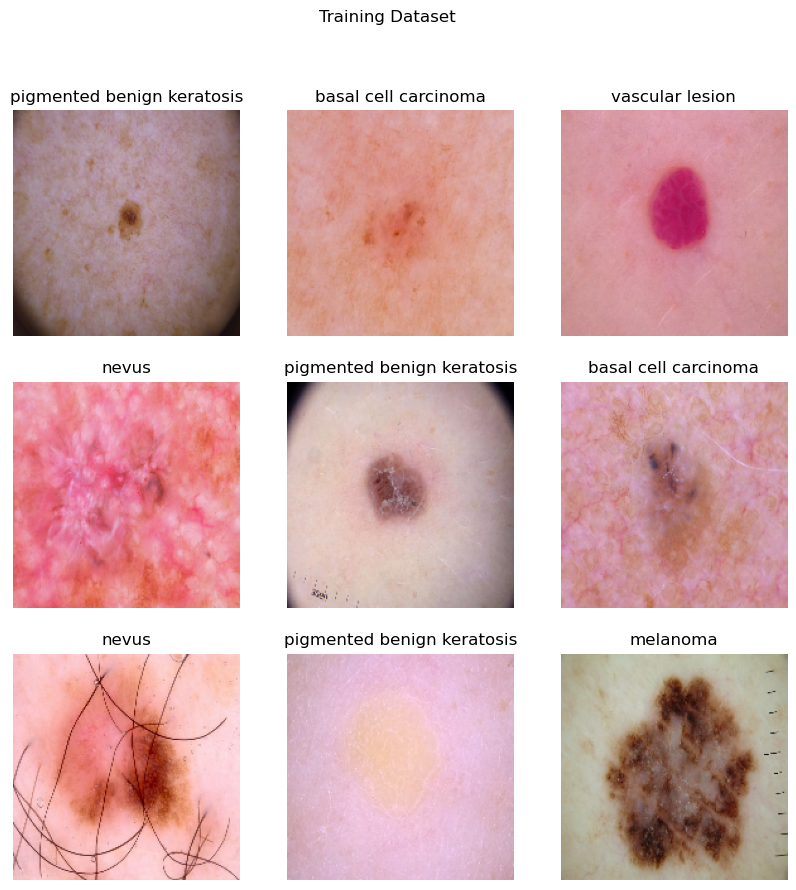

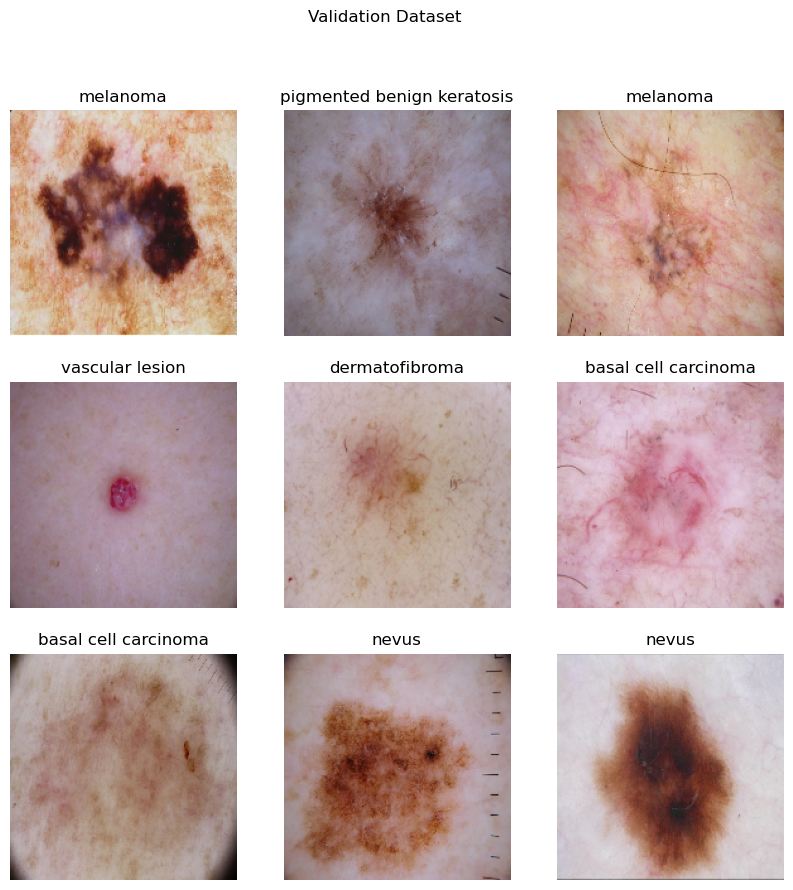

In [28]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

# Function to visualize a batch of images and their corresponding labels
def visualize_dataset(dataset, class_names, title="Dataset Images"):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Get class names
class_names = train_ds.class_names

# Visualize training dataset
visualize_dataset(train_ds, class_names, title="Training Dataset")

# Visualize validation dataset
visualize_dataset(val_ds, class_names, title="Validation Dataset")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [32]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [35]:
### Your code goes here

from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')  # Assuming 9 classes
])

C:\Users\91702\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [37]:
#pip install pytorch_toolbelt

In [40]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [42]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,897,609 (11.05 MB)

 Trainable params: 2,897,609 (11.05 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [45]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 45s 571ms/step - accuracy: 0.1562 - loss: 23.2261 - val_accuracy: 0.2550 - val_loss: 2.1107
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 574ms/step - accuracy: 0.2247 - loss: 2.1088 - val_accuracy: 0.2640 - val_loss: 1.9716
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 566ms/step - accuracy: 0.2589 - loss: 2.0183 - val_accuracy: 0.2729 - val_loss: 1.9416
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 573ms/step - accuracy: 0.2350 - loss: 1.9868 - val_accuracy: 0.2796 - val_loss: 1.8931
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 574ms/step - accuracy: 0.2672 - loss: 1.9324 - val_accuracy: 0.2013 - val_loss: 1.9680
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 578ms/step - accuracy: 0.2176 - loss: 1.9832 - val_accuracy: 0.2550 - val_loss: 1.8810
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 45s 643ms/step - accuracy: 0.2715 - loss: 1.9417 - val_accuracy: 0.3311 - val_loss: 1.8025
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 620ms/step - accuracy: 0.2753 - loss: 1.9031 - val_acc

### Visualizing training results

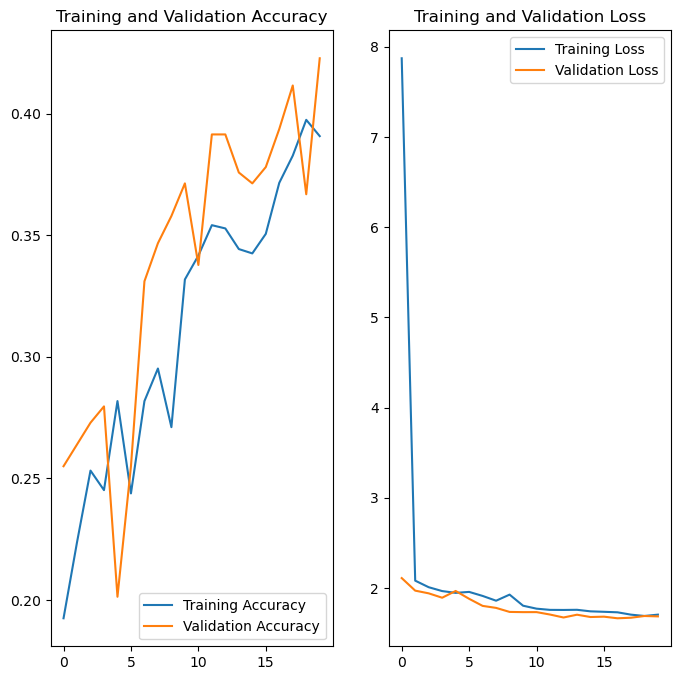

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
##Training Accuracy is less than Validation Accuracy indicates that model is underfit

### Write your findings here

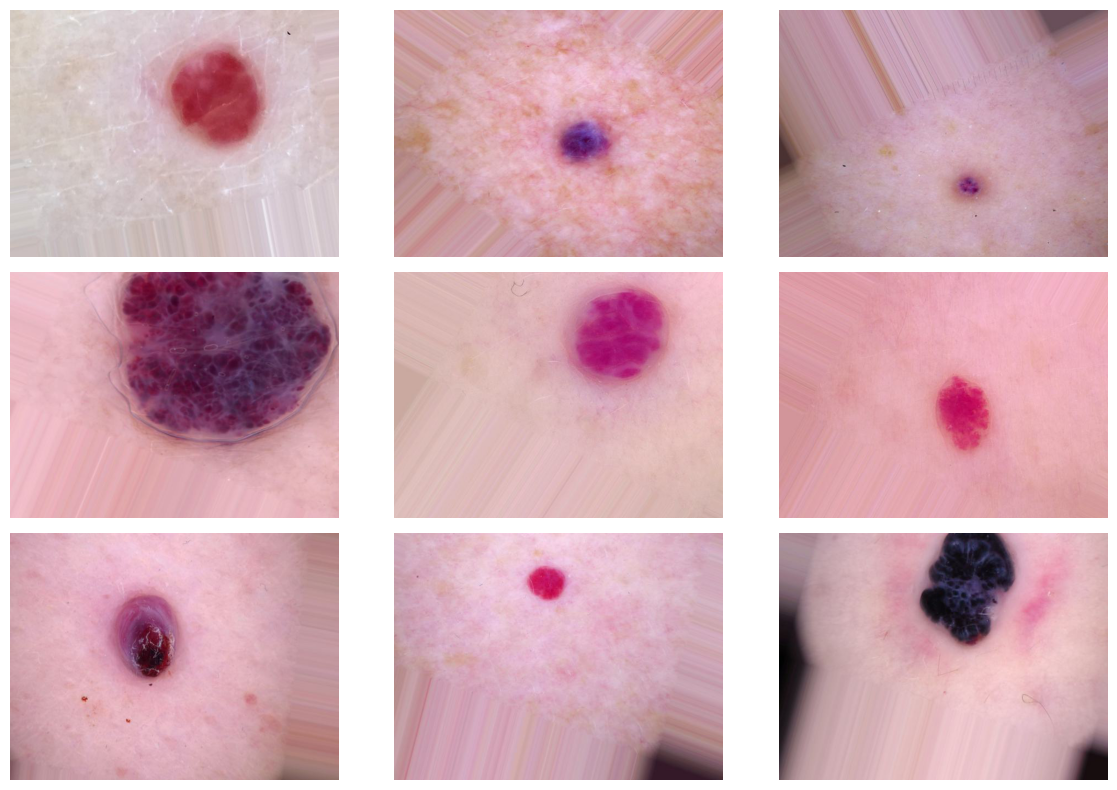

In [54]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt

# Data augmentation setup
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Directory paths
train_image_dir = 'C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
augmented_train_dir = 'C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train_Aug'

# Iterate over each subfolder in the training directory
for class_folder in os.listdir(train_image_dir):
    class_path = os.path.join(train_image_dir, class_folder)
    
os.makedirs(augmented_train_dir, exist_ok=True)

# List of image files in the training directory
if os.path.isdir(class_path):
    train_image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpeg'))]

# Number of augmentations per image
num_augmented_images = 5

# Augment each image
for image_file in train_image_files:
    image_path = os.path.join(class_path, image_file)
    image = load_img(image_path)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, 0)  # Add batch dimension

    i = 0
    for batch in datagen.flow(image_array, batch_size=1, save_to_dir=augmented_train_dir,
                              save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_augmented_images:
            break

# Load validation images
validation_image_dir = 'C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

# Iterate over each subfolder in the training directory
for class_folder in os.listdir(validation_image_dir):
    class_path = os.path.join(validation_image_dir, class_folder)
    
validation_image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpeg'))]
    
validation_images = []
for image_file in validation_image_files:
    image_path = os.path.join(validation_image_dir, image_file)
    image = load_img(image_path)
    image_array = img_to_array(image)
    validation_images.append(image_array)

validation_images = np.array(validation_images)

# Visualize some augmented images
augmented_image_files = os.listdir(augmented_train_dir)
plt.figure(figsize=(12, 8))
for i, image_file in enumerate(augmented_image_files[:9]):  # Display 9 augmented images
    augmented_image_path = os.path.join(augmented_train_dir, image_file)
    augmented_image = load_img(augmented_image_path)
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [56]:
# Define the CNN model
#model_aug = models.Sequential([
#    layers.InputLayer(input_shape=(img_height, img_width, 3)),
#    layers.Conv2D(32, (3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(64, (3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(128, (3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Conv2D(128, (3, 3), activation='relu'),
#    layers.MaxPooling2D((2, 2)),
#    layers.Flatten(),
#    layers.Dense(256, activation='relu'),
#    layers.Dropout(0.5),
#    layers.Dense(9, activation='softmax')  # Assuming 9 classes
#])

#model_aug.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# View the summary of all layers
#model_aug.summary()


In [58]:
# Below set of code is commented because i tried to improve model but due to shortage of time, 
# i could not able to resolve compilation error coming in below set of code.

In [60]:
# # Define a function to load and preprocess images
# def load_image(image_path):
#     image = tf.io.read_file(image_path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [150, 150])
#     image = image / 255.0  # Normalize to [0, 1] range
#     return image

# # Convert lists to TensorFlow datasets
# train_dataset_aug = tf.data.Dataset.from_tensor_slices(train_image_files)
# validation_dataset_aug = tf.data.Dataset.from_tensor_slices(validation_image_files)

# # Apply the load_image function to the datasets
# train_dataset_aug = train_dataset_aug.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# validation_dataset_aug = validation_dataset_aug.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# # Apply cache, shuffle, batch, and prefetch to the datasets
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# train_dataset_aug = train_dataset_aug.cache().shuffle(1000).batch(32).prefetch(buffer_size=AUTOTUNE)
# validation_dataset_aug = validation_dataset_aug.cache().batch(32).prefetch(buffer_size=AUTOTUNE)


In [62]:
# epochs = 20
# history_aug = model_aug.fit(
#   train_dataset_aug,
#   validation_data=validation_dataset_aug,
#   epochs=epochs
# )

In [64]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [66]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


### Todo:
### Create the model, compile and train the model


In [69]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')  # Assuming 9 classes
])

### Compiling the model

In [72]:
## Your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,897,609 (11.05 MB)

 Trainable params: 2,897,609 (11.05 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 44s 601ms/step - accuracy: 0.1906 - loss: 16.7667 - val_accuracy: 0.2819 - val_loss: 1.9124
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 590ms/step - accuracy: 0.2711 - loss: 2.0198 - val_accuracy: 0.3803 - val_loss: 1.7777
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 605ms/step - accuracy: 0.3430 - loss: 1.8322 - val_accuracy: 0.3199 - val_loss: 1.8172
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 582ms/step - accuracy: 0.3278 - loss: 1.8267 - val_accuracy: 0.3400 - val_loss: 1.9435
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 588ms/step - accuracy: 0.3319 - loss: 1.8305 - val_accuracy: 0.3087 - val_loss: 1.7366
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 588ms/step - accuracy: 0.3340 - loss: 1.7343 - val_accuracy: 0.3691 - val_loss: 1.6629
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 592ms/step - accuracy: 0.3673 - loss: 1.6750 - val_accuracy: 0.3781 - val_loss: 1.6315
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 42s 601ms/step - accuracy: 0.4103 - loss: 1.6092 - val_acc

### Visualizing the results

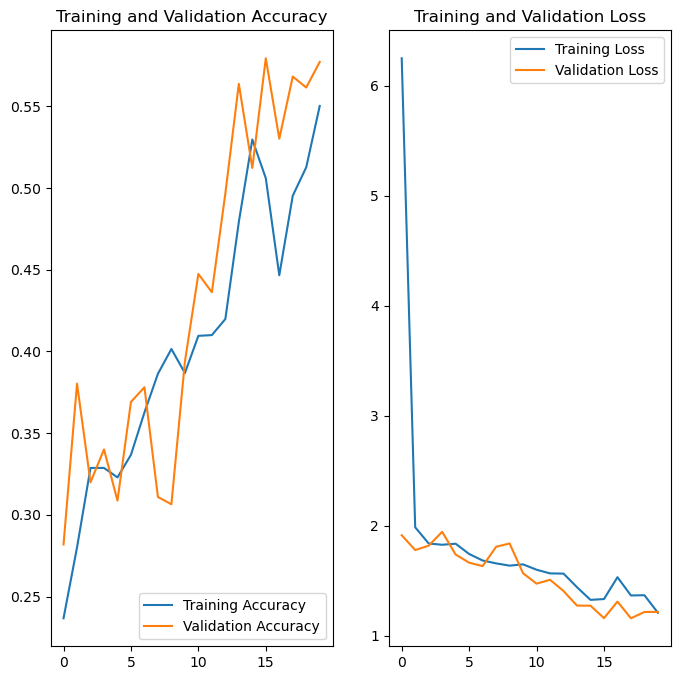

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [113]:
#There is quite improvement in accuracy and loss. We can't say model is overfit or underfit because its almost matching 
#in both training and validation data set.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [116]:
## Your code goes here.
import os

# Define the path to your training data directory
train_data_dir = r'C:\Users\91702\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train'

# Initialize an empty dictionary to store class counts
class_counts = {}

# Iterate through each subfolder (class) in the training data directory
for class_name in os.listdir(train_data_dir):
    class_path = os.path.join(train_data_dir, class_name)
    if os.path.isdir(class_path):
        # Count the number of files (images) in this class
        num_images = len(os.listdir(class_path))
        # Store the class count in the dictionary
        class_counts[class_name] = num_images

# Print or display the class distribution
print("Class Distribution in Training Dataset:")
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

# Optionally, you can calculate proportions or percentages as well
total_images = sum(class_counts.values())
print(f"Total images: {total_images}")

# Calculate and display class proportions
print("\nClass Proportions:")
for class_name, count in class_counts.items():
    proportion = count / total_images
    print(f"Class '{class_name}': {proportion:.2%}")


Class Distribution in Training Dataset:
Class 'actinic keratosis': 115 images
Class 'basal cell carcinoma': 377 images
Class 'dermatofibroma': 96 images
Class 'melanoma': 439 images
Class 'nevus': 358 images
Class 'pigmented benign keratosis': 463 images
Class 'seborrheic keratosis': 78 images
Class 'squamous cell carcinoma': 182 images
Class 'vascular lesion': 140 images
Total images: 2248

Class Proportions:
Class 'actinic keratosis': 5.12%
Class 'basal cell carcinoma': 16.77%
Class 'dermatofibroma': 4.27%
Class 'melanoma': 19.53%
Class 'nevus': 15.93%
Class 'pigmented benign keratosis': 20.60%
Class 'seborrheic keratosis': 3.47%
Class 'squamous cell carcinoma': 8.10%
Class 'vascular lesion': 6.23%


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [119]:
# Seborrheic Keratosis class has least number of samples whereas pigmented benign keratosis class has highest number of samples
# there is large variation of number of samples in each class

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [122]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [127]:
path_to_training_dataset = 'C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29B41C77790>: 100%|██████████| 500/500 [00:04<00:00, 118.83 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29B42241F10>: 100%|██████████| 500/500 [00:04<00:00, 122.50 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29B41C04490>: 100%|██████████| 500/500 [00:04<00:00, 113.91 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x29B4892DCD0>: 100%|██████████| 500/500 [00:19<00:00, 25.37 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x29B42233F50>: 100%|██████████| 500/500 [00:19<00:00, 25.53 Samples/s]                  


Initialised with 462 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29B3D55FA90>: 100%|██████████| 500/500 [00:04<00:00, 121.26 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x29B41E94B10>: 100%|██████████| 500/500 [00:09<00:00, 51.11 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29B3D55D850>: 100%|██████████| 500/500 [00:04<00:00, 119.06 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29B0B8FE110>: 100%|██████████| 500/500 [00:04<00:00, 108.91 Samples/s]                  


In [129]:
import os
import Augmentor

# Define your path to the training dataset
path_to_training_dataset = 'C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

# Fetch all directories (class names) in the specified path
class_names = [folder_name for folder_name in os.listdir(path_to_training_dataset) if os.path.isdir(os.path.join(path_to_training_dataset, folder_name))]

# Iterate through each class and apply augmentation
for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)

    # Create an Augmentor pipeline for augmentation
    p = Augmentor.Pipeline(class_path)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  # Sample 500 augmented images per class

Initialised with 114 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29B41C57190>: 100%|██████████| 500/500 [00:04<00:00, 110.63 Samples/s]


Initialised with 376 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29B3DA4ABD0>: 100%|██████████| 500/500 [00:04<00:00, 115.59 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29B421E9D10>: 100%|██████████| 500/500 [00:04<00:00, 115.94 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x29B3DA49110>: 100%|██████████| 500/500 [00:19<00:00, 25.42 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x29B3D55E510>: 100%|██████████| 500/500 [00:19<00:00, 25.34 Samples/s]                    


Initialised with 462 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29B086F6990>: 100%|██████████| 500/500 [00:04<00:00, 111.56 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x29B489211D0>: 100%|██████████| 500/500 [00:09<00:00, 53.60 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x29B3DA48C90>: 100%|██████████| 500/500 [00:04<00:00, 116.64 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x29B41C62190>: 100%|██████████| 500/500 [00:04<00:00, 118.42 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [132]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [135]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\91702\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_06fd38e7-9c06-45e4-a62c-7b151560b587.jpg',
 'C:\\Users\\91702\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_21fb9b24-2da7-4f33-a88f-21588c6aa438.jpg',
 'C:\\Users\\91702\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_28a5260c-3012-4835-a94e-9028d504d4b2.jpg',
 'C:\\Users\\91702\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_539c024f-aea5-4906-8d0b-75db43081441.jpg',
 'C:\\Users\\91702\\Downloads\\CNN_assignment\\Skin cancer ISIC The Internat

In [136]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [139]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [141]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = df2

In [143]:
new_df['Label'].value_counts()

Label
actinic keratosis             1500
basal cell carcinoma          1500
dermatofibroma                1500
melanoma                      1500
nevus                         1500
pigmented benign keratosis    1500
seborrheic keratosis          1500
squamous cell carcinoma       1500
vascular lesion               1500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [147]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [150]:
data_dir_train='C:/Users/91702/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15739 files belonging to 9 classes.
Using 12592 files for training.


#### **Todo:** Create a validation dataset

In [152]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=32)

Found 15739 files belonging to 9 classes.
Using 3147 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [156]:
## your code goes here
model = models.Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    #layers.Dropout(0.5),
    layers.Dense(9, activation='softmax')  # Assuming 9 classes
])

C:\Users\91702\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [159]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [161]:
# View the summary of all layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,897,609 (11.05 MB)

 Trainable params: 2,897,609 (11.05 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [164]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 239s 600ms/step - accuracy: 0.2197 - loss: 5.4606 - val_accuracy: 0.2831 - val_loss: 1.8850
Epoch 2/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 236s 599ms/step - accuracy: 0.3122 - loss: 1.8101 - val_accuracy: 0.4531 - val_loss: 1.3782
Epoch 3/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 237s 601ms/step - accuracy: 0.4269 - loss: 1.5056 - val_accuracy: 0.4925 - val_loss: 1.3503
Epoch 4/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 240s 608ms/step - accuracy: 0.5955 - loss: 1.0864 - val_accuracy: 0.7267 - val_loss: 0.7884
Epoch 5/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 238s 603ms/step - accuracy: 0.7612 - loss: 0.6974 - val_accuracy: 0.7906 - val_loss: 0.6497
Epoch 6/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 238s 603ms/step - accuracy: 0.8118 - loss: 0.5490 - val_accuracy: 0.8214 - val_loss: 0.5342
Epoch 7/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 238s 604ms/step - accuracy: 0.8553 - loss: 0.4320 - val_accuracy: 0.8468 - val_loss: 0.5044
Epoch 8/30
394/394 ━━━━━━━━━━━━━━━━━━━━ 238s 604ms/step - accuracy: 0.8919 -

#### **Todo:**  Visualize the model results

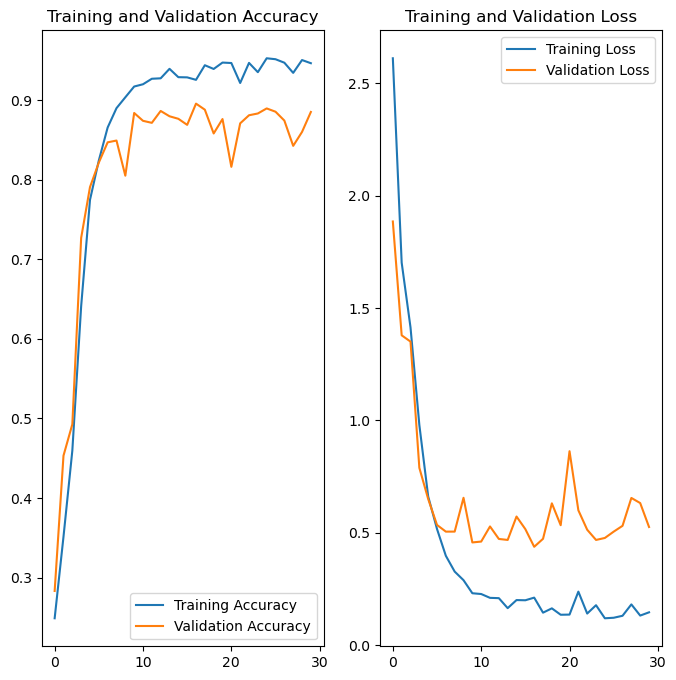

In [167]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
#Accuracy got improved but there is overfit condition. We can still improve our model to make as close as possible.